<a href="https://colab.research.google.com/github/eminshall/QuantFinanceWorkbooks/blob/main/Simple_Moving_Average_Basics_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Grab Data
import yfinance as yf

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
#Get the stock data
data = yf.download('BTC-USD', start="2018-01-01", end="2023-02-28")['Adj Close']
data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data['sma_Short'] = data['Adj Close'].rolling(42).mean()
data['sma_Long'] = data['Adj Close'].rolling(252).mean()

data.tail()

,Adj Close,sma_Short,sma_Long
Date,,,
2023-02-23,23947.492188,22798.940337,20113.607499
2023-02-24,23198.126953,22877.239211,20124.427517
2023-02-25,23175.375000,22929.598168,20140.926456
2023-02-26,23561.212891,22993.417550,20152.862731
2023-02-27,23522.871094,23049.447033,20164.463263


<ipython-input-5-570faf236e51>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: title={'center': 'BTC-USD | 42 & 252 days SMAs'}, xlabel='Date'>

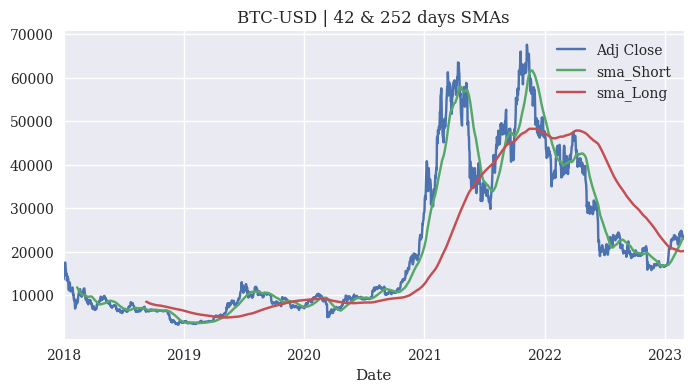

In [ ]:
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

data.plot(title='BTC-USD | 42 & 252 days SMAs', figsize=(8,4))

<Axes: title={'center': 'Market Positioning'}, xlabel='Date'>

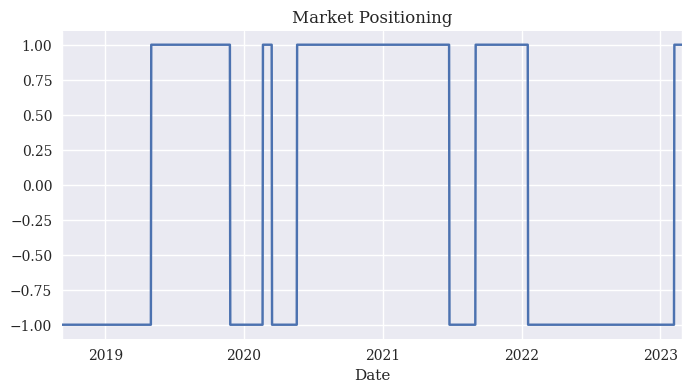

In [ ]:
data['position'] = np.where(data['sma_Short'] > data['sma_Long'], 1,-1)

data.dropna(inplace=True)

data['position'].plot(ylim=[-1.1,1.1],
                      title='Market Positioning',
                      figsize=(8,4))

<Axes: >

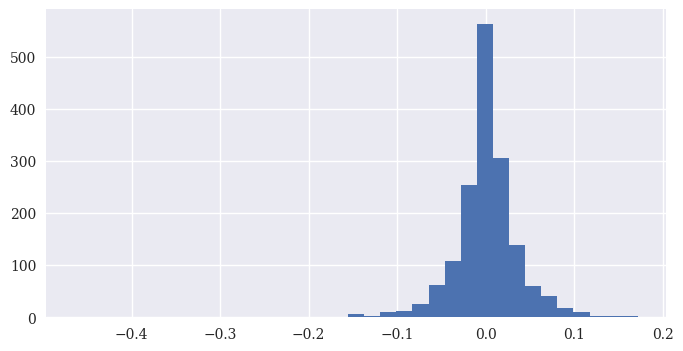

In [ ]:
# Calculates the log returns in vector form
data['returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Plots Histogram
data['returns'].hist(bins=35, figsize=(8,4))

In [ ]:
# Calculates the log returns of the strategy given the returns and position
data['strategy'] = data['position'].shift(1) * data['returns']

# Applies exponential function to the sum of returns for gross performance
data[['returns', 'strategy']].sum().apply(np.exp)

returns     3.733280
strategy    1.207779
dtype: float64

In [ ]:
# Using cumsum() provides a cumulative summation for more granular performance
data[['returns', 'strategy']].cumsum().apply(np.exp)

,returns,strategy
Date,,
2018-09-09,NaN,NaN
2018-09-10,1.004577,0.995444
2018-09-11,1.003228,0.996782
2018-09-12,1.008085,0.991980
2018-09-13,1.034352,0.966788
...,...,...
2023-02-23,3.800670,1.229581
2023-02-24,3.681740,1.191105
2023-02-25,3.678129,1.189937


<Axes: xlabel='Date'>

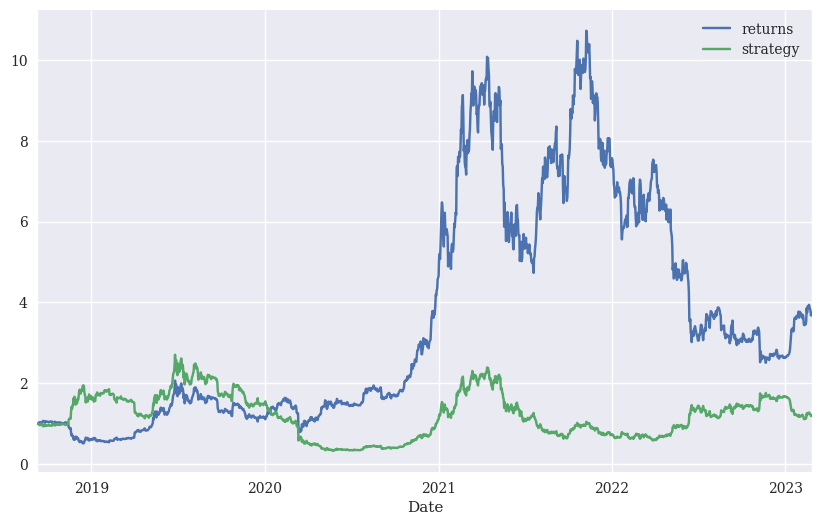

In [ ]:
# Plot
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

<Axes: xlabel='Date'>

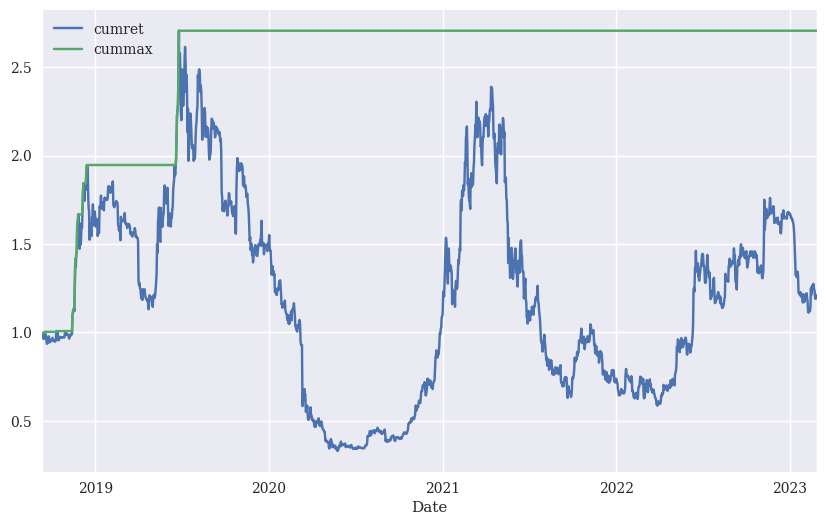

In [ ]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)
data['cummax'] = data['cumret'].cummax()

data[['cumret','cummax']].dropna().plot(figsize=(10,6))

In [ ]:
data.head()

,Adj Close,sma_Short,sma_Long,position,returns,strategy,cumret,cummax
Date,,,,,,,,
2018-09-09,6300.859863,6787.346389,8526.048173,-1,NaN,NaN,NaN,NaN
2018-09-10,6329.700195,6743.280204,8496.970792,-1,0.004567,-0.004567,0.995444,0.995444
2018-09-11,6321.200195,6708.536400,8462.602144,-1,-0.001344,0.001344,0.996782,0.996782
2018-09-12,6351.799805,6678.224249,8427.486270,-1,0.004829,-0.004829,0.991980,0.996782
2018-09-13,6517.310059,6653.228062,8391.447023,-1,0.025724,-0.025724,0.966788,0.996782
